In [179]:
import pandas as pd
import datetime

In [228]:
columns = ['location','date','population','median_age','new_deaths']
df = pd.read_csv('owid-covid-data.csv', usecols=columns)

print(df)

           location        date  new_deaths  median_age  population
0       Afghanistan  2020-02-24         NaN        18.6  41128772.0
1       Afghanistan  2020-02-25         NaN        18.6  41128772.0
2       Afghanistan  2020-02-26         NaN        18.6  41128772.0
3       Afghanistan  2020-02-27         NaN        18.6  41128772.0
4       Afghanistan  2020-02-28         NaN        18.6  41128772.0
...             ...         ...         ...         ...         ...
252512     Zimbabwe  2023-01-20         0.0        19.6  16320539.0
252513     Zimbabwe  2023-01-21         0.0        19.6  16320539.0
252514     Zimbabwe  2023-01-22         0.0        19.6  16320539.0
252515     Zimbabwe  2023-01-23         0.0        19.6  16320539.0
252516     Zimbabwe  2023-01-24        15.0        19.6  16320539.0

[252517 rows x 5 columns]


In [181]:
import pandasql as ps
from pandasql import sqldf

In [218]:
pysqldf = lambda q: ps.sqldf(q, globals())
query = """
SELECT
location,
SUM(new_deaths) as total_deaths,
strftime('%Y', date) || '-' || strftime('%m', date) || '-01' as year_month
FROM df 
WHERE location = 'France' AND total_deaths IS NOT NULL
GROUP BY location, strftime('%Y', date) || '-' || strftime('%m', date) || '-01'
ORDER BY date ASC
"""
result = pysqldf(query)

print(result)
result.to_csv('france_total_death.csv', mode='a', index=False)

   location  total_deaths  year_month
0    France           2.0  2020-02-01
1    France        3524.0  2020-03-01
2    France       20823.0  2020-04-01
3    France        4753.0  2020-05-01
4    France        1041.0  2020-06-01
5    France         436.0  2020-07-01
6    France         378.0  2020-08-01
7    France        1345.0  2020-09-01
8    France        4848.0  2020-10-01
9    France       15980.0  2020-11-01
10   France       11901.0  2020-12-01
11   France       11425.0  2021-01-01
12   France       10371.0  2021-02-01
13   France        9213.0  2021-03-01
14   France        8875.0  2021-04-01
15   France        5016.0  2021-05-01
16   France        1566.0  2021-06-01
17   France         795.0  2021-07-01
18   France        2578.0  2021-08-01
19   France        2244.0  2021-09-01
20   France         990.0  2021-10-01
21   France        1476.0  2021-11-01
22   France        4612.0  2021-12-01
23   France        7206.0  2022-01-01
24   France        7425.0  2022-02-01
25   France 

In [183]:
from sklearn.linear_model import LinearRegression

In [195]:
# Create an instance of the linear regression model
linear_reg = LinearRegression()

# Split the data into training and testing sets
X_train = result[['months']]
y_train = result['total_deaths']

# Train the model using the training data
linear_reg.fit(X_train, y_train)

# Make predictions for the months of February and March 2023
X_test = [[37], [38]]
y_pred = linear_reg.predict(X_test)

print("Predicted total deaths for February 2023: ", y_pred[0])
print("Predicted total deaths for March 2023: ", y_pred[1])


Predicted total deaths for February 2023:  1949.8396825396821
Predicted total deaths for March 2023:  1808.2934791934795


C:\Users\asus7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [220]:
# Create a new dataframe with the same columns as the original
predictions = pd.DataFrame(columns=result.columns)

# Add the predicted values for February and March 2023 to the new dataframe
predictions = pd.concat([predictions, pd.DataFrame({'location': ['France'], 'year_month': ['2023-02'] , 'total_deaths': y_pred[0]})])
predictions = pd.concat([predictions, pd.DataFrame({'location': ['France'], 'year_month': ['2023-03'] , 'total_deaths': y_pred[1]})])

# Concatenate the original dataframe with the new dataframe
prediction = pd.concat([result, predictions], axis=0)
print(prediction)

   location  total_deaths  year_month
0    France      2.000000  2020-02-01
1    France   3524.000000  2020-03-01
2    France  20823.000000  2020-04-01
3    France   4753.000000  2020-05-01
4    France   1041.000000  2020-06-01
5    France    436.000000  2020-07-01
6    France    378.000000  2020-08-01
7    France   1345.000000  2020-09-01
8    France   4848.000000  2020-10-01
9    France  15980.000000  2020-11-01
10   France  11901.000000  2020-12-01
11   France  11425.000000  2021-01-01
12   France  10371.000000  2021-02-01
13   France   9213.000000  2021-03-01
14   France   8875.000000  2021-04-01
15   France   5016.000000  2021-05-01
16   France   1566.000000  2021-06-01
17   France    795.000000  2021-07-01
18   France   2578.000000  2021-08-01
19   France   2244.000000  2021-09-01
20   France    990.000000  2021-10-01
21   France   1476.000000  2021-11-01
22   France   4612.000000  2021-12-01
23   France   7206.000000  2022-01-01
24   France   7425.000000  2022-02-01
25   France 

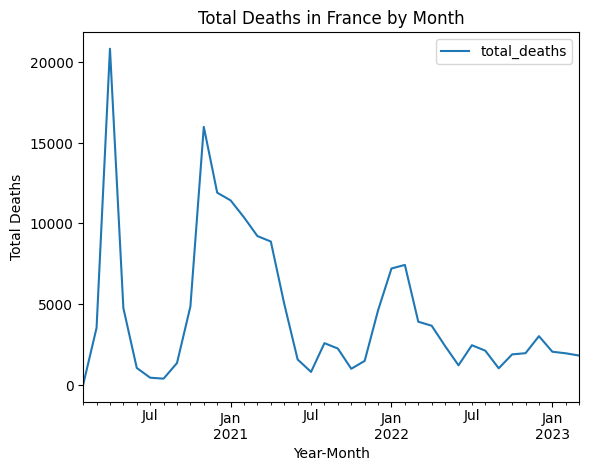

In [221]:
import matplotlib.pyplot as plt

prediction['year_month'] = pd.to_datetime(prediction['year_month'])
prediction = prediction.set_index('year_month')
prediction.plot()
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths')
plt.title('Total Deaths in France by Month')
plt.show()


In [211]:
pysqldf = lambda q: ps.sqldf(q, globals())
q = """
SELECT
location,
median_age,
SUM(new_deaths) as total_deaths
FROM df
WHERE location IN ('United States','China','France','Germany')
GROUP BY location
"""

result2 = pysqldf(q)

print(result2)

correlation = result2['median_age'].corr(result2['total_deaths'])
print(correlation)

        location  median_age  total_deaths
0          China        38.7       76837.0
1         France        42.0      164464.0
2        Germany        46.6      165010.0
3  United States        38.3     1105766.0
-0.47717620240194464
